<a href="https://colab.research.google.com/github/AndreyBocharnikov/Visual-Transformers/blob/master/Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!git clone git@github.com:AndreyBocharnikov/Visual-Transformers.git

In [ ]:
%cd /content/Visual-Transformers

/content/Visual-Transformers


## Classification training

### ResNet18 model (baseline)

In [ ]:
!python main.py classification train \
 /content/drive/MyDrive/ML/ILSVRC/Data/CLS-LOC/ \
 --model ResNet18

Namespace(batch_size=256, data='/content/drive/MyDrive/ML/ILSVRC/Data/CLS-LOC/', device='cuda:0', epochs=15, from_pretrained=None, learning_mode='train', model='ResNet18', save_model_path='/content/drive/MyDrive/ML/weights/classification/adv training/', task_mode='classification', verbose_every=100, weights=None)
Training data info:
Number of classes: 144
Number of images: 187199

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Validation data info:
Number of classes: 144
Number of images: 7200

Training from scratch.
Number of batches in training data 732
Epoch = 1, batches passed = 

### VT_ResNet18 model

Training from epoch 1 to 12, then `DataLoader worker (pid 9207) is killed by signal: Killed` happend.

In [ ]:
!python main.py classification train \
 /content/drive/MyDrive/ML/ILSVRC/Data/CLS-LOC/ \
 --model VT_ResNet18

Namespace(batch_size=256, data='/content/drive/MyDrive/ML/ILSVRC/Data/CLS-LOC/', device='cuda:0', epochs=15, from_pretrained=None, learning_mode='train', model='VT_ResNet18', save_model_path='./state_dict', task_mode='classification', verbose_every=100, weights=None)
Training data info:
Number of classes: 144
Number of images: 187199

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Validation data info:
Number of classes: 144
Number of images: 7200

Training from scratch.
Number of batches in training data 732
Epoch = 1, batches passed = 100
Loss:  4.460473329714029
Accuracy:  0.06079

Training from epoch 12 to epoch 15.

In [ ]:
!python main.py classification train \
 /content/drive/MyDrive/ML/ILSVRC/Data/CLS-LOC/ \
 --model VT_ResNet18 \
 --from_pretrained /content/drive/MyDrive/ML/weights/classification/adv\ training/state_dict11.pt

Namespace(batch_size=256, data='/content/drive/MyDrive/ML/ILSVRC/Data/CLS-LOC/', device='cuda:0', epochs=15, from_pretrained='/content/drive/MyDrive/ML/weights/classification/adv training/state_dict11.pt', learning_mode='train', model='VT_ResNet18', save_model_path='/content/drive/MyDrive/ML/weights/classification/adv training/', task_mode='classification', verbose_every=100, weights=None)
Training data info:
Number of classes: 144
Number of images: 187199

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Validation data info:
Number of classes: 144
Number of images: 7200

Training fro

### Results

In [ ]:
n_epochs = 15
epochs = range(1, n_epochs + 1)
VT_training_loss = [3.019841, 2.570782, 2.235163, 2.066087, 1.952538, 1.506464, 1.469038, 1.417369, 1.387080, 1.374635, 1.298390, 1.288616, 1.268498, 1.247876, 1.249382]
VT_training_accuracy = [0.280252, 0.379870, 0.444922, 0.485269, 0.507706, 0.608955, 0.622060, 0.630754, 0.639937, 0.644727, 0.654672, 0.668171, 0.671581, 0.671731, 0.672889]

VT_validation_loss = [3.600068, 2.688119, 2.339151, 2.575219, 1.823288, 1.301426, 1.251453, 1.232097, 1.211158, 1.160576, 1.130203, 1.120518, 1.120228, 1.110770, 1.114401]
VT_validation_accuracy = [0.198949, 0.348195, 0.420259, 0.402344, 0.519935, 0.651401, 0.658001, 0.666352, 0.670124, 0.689251, 0.691541, 0.693561, 0.697468, 0.697333, 0.696929]

baseline_training_loss = [3.232591, 2.665400, 2.317014, 2.079879, 1.826492, 1.523123, 1.502995, 1.502676, 1.453518, 1.413757, 1.334647, 1.361368, 1.321162, 1.344701, 1.312150]
baseline_training_accuracy = [0.240291, 0.356629, 0.432132, 0.478409, 0.534538, 0.613468, 0.613231, 0.615019, 0.628722, 0.632652, 0.656704, 0.644961, 0.655460, 0.653530, 0.664675]

baseline_validation_loss = [3.614915, 2.751615, 2.441597, 2.122290, 1.796557, 1.360040, 1.32420, 1.282367, 1.276094, 1.227872, 1.188538, 1.183544, 1.181263, 1.183403, 1.173559]
baseline_validation_accuracy = [0.182786, 0.325296, 0.391703, 0.455415, 0.534752, 0.641433, 0.648707, 0.661907, 0.667834, 0.670797, 0.686557, 0.689386, 0.687904, 0.689925, 0.691541]

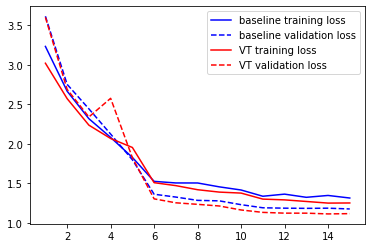

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(epochs, baseline_training_loss, 'b-', label='baseline training loss')
ax.plot(epochs, baseline_validation_loss, 'b--', label='baseline validation loss')
ax.plot(epochs, VT_training_loss, 'r-', label='VT training loss')
ax.plot(epochs, VT_validation_loss, 'r--', label='VT validation loss')
legend = ax.legend(loc='upper right')
#plt.xlabel('epoch', fontsize=18)
#plt.ylabel('crossentripy', fontsize=16)
plt.show()

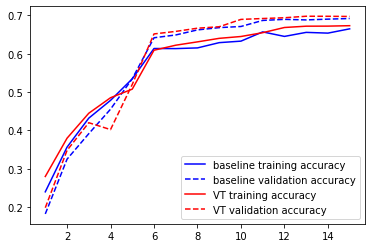

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(epochs, baseline_training_accuracy, 'b-', label='baseline training accuracy')
ax.plot(epochs, baseline_validation_accuracy, 'b--', label='baseline validation accuracy')
ax.plot(epochs, VT_training_accuracy, 'r-', label='VT training accuracy')
ax.plot(epochs, VT_validation_accuracy, 'r--', label='VT validation accuracy')
legend = ax.legend(loc='lower right')
#plt.xlabel('epoch', fontsize=18)
#plt.ylabel('accuracy', fontsize=16)
plt.show()

## Semantic segmentation training

### Panoptic FPN model (baseline)

In [ ]:
# fixed bug (resize in validation 320 -> 512)
# size_average=True
!python main.py semantic_segmentation train \
/content/drive/MyDrive/ML/dataset/ --model PanopticFPN

Namespace(batch_size=8, data='/content/drive/MyDrive/ML/dataset/', device='cuda:0', epochs=5, from_pretrained=None, ignore_index=163, learning_mode='train', lr=0.01, metric=<function mIOU at 0x7fb278bea5f0>, model='PanopticFPN', n_classes=91, nesterov=False, save_model_path='/content/drive/MyDrive/ML/weights/semantic_segmentation/', task_mode='semantic_segmentation', update_every=2, verbose_every=2000, weight_decay=1e-05, weights=None)
118287
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
5000
Training from scratch.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: Us

### VT FPN

In [ ]:
# val crop_size = 512, size_average=True
!python main.py semantic_segmentation train \
/content/drive/MyDrive/ML/dataset/

Namespace(batch_size=8, data='/content/drive/MyDrive/ML/dataset/', device='cuda:0', epochs=5, from_pretrained=None, ignore_index=163, learning_mode='train', lr=0.04, metric=<function mIOU at 0x7f9b8a4aa5f0>, model='VT_FPN', n_classes=91, nesterov=False, save_model_path='/content/drive/MyDrive/ML/weights/semantic_segmentation/', task_mode='semantic_segmentation', update_every=2, verbose_every=2000, weight_decay=1e-05, weights=None)
118287
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
5000
Training from scratch.
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" 

### Results

In [29]:
import numpy as np

epoch = 5
epochs = range(1, epoch + 1)

PFPN_training_loss = [2.114447, 2.085790, 2.052687, 2.043921, 2.044084]
PFPN_validation_loss = [2.171513, 2.137527, 2.103017, 2.098946, 2.101253]
VTFPN_training_loss = [2.100531, 2.077319, 2.079617, 2.067439, 2.068598]
VTFPN_validation_loss = [2.161394, 2.128563, 2.127094, 2.120225, 2.120928]

PFPN_training_mIOU = np.array([0.048939, 0.061821, 0.077890, 0.082139, 0.080968]) * 100
PFPN_validation_mIOU = np.array([0.016444, 0.027108, 0.043357, 0.043, 0.043148]) * 100
VTFPN_training_mIOU = np.array([0.047437, 0.063221, 0.063963, 0.069851, 0.070343]) * 100
VTFPN_validation_mIOU = np.array([0.015052, 0.031313, 0.029853, 0.032848, 0.032351]) * 100

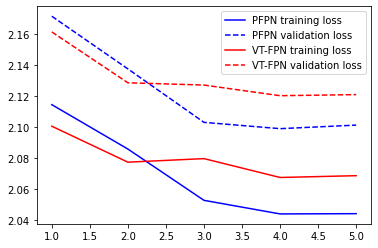

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(epochs, PFPN_training_loss, 'b-', label='PFPN training loss')
ax.plot(epochs, PFPN_validation_loss, 'b--', label='PFPN validation loss')
ax.plot(epochs, VTFPN_training_loss, 'r-', label='VT-FPN training loss')
ax.plot(epochs, VTFPN_validation_loss, 'r--', label='VT-FPN validation loss')
legend = ax.legend(loc='upper right')
plt.show()

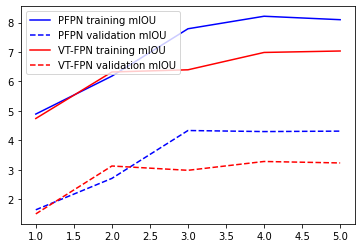

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(epochs, PFPN_training_mIOU, 'b-', label='PFPN training mIOU')
ax.plot(epochs, PFPN_validation_mIOU, 'b--', label='PFPN validation mIOU')
ax.plot(epochs, VTFPN_training_mIOU, 'r-', label='VT-FPN training mIOU')
ax.plot(epochs, VTFPN_validation_mIOU, 'r--', label='VT-FPN validation mIOU')
legend = ax.legend(loc='upper left')
plt.show()

## Legacy

old experiments with worse params and results

Basic training of baseline classification (no lr decay and basic init)

In [ ]:
!python main.py classification train \
 /content/drive/MyDrive/ML/ILSVRC/Data/CLS-LOC/ \
 --model ResNet18

Namespace(batch_size=256, data='/content/drive/MyDrive/ML/ILSVRC/Data/CLS-LOC/', device='cuda:0', epochs=10, from_pretrained=None, learning_mode='train', model='ResNet18', save_model_path='./state_dict', task_mode='classification', verbose_every=100, weights=None)
Training data info:
Number of classes: 144
Number of images: 187199

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Validation data info:
Number of classes: 144
Number of images: 7200

Training from scratch.
Number of batches in training data 732
Epoch = 1, batches passed = 100
Loss:  4.65032963233419
Accuracy:  0.045095915

In [ ]:
Train:
Loss:     3.181268 2.656574 2.287873 2.033927 1.864689 1.732697 1.630758 1.553750 1.497877  1.448391
Accuracy: 0.243182 0.353889 0.430274 0.485749 0.531994 0.558951 0.579925 0.599464 0.616917 0.618712

Val:    
Loss:     3.395340 3.622688 2.435769 1.997134 1.791836 2.082107 1.702209 1.660053 1.497877 1.422443
Accuracy: 0.211342 0.228718 0.40854  0.486395 0.540275 0.488685 0.553475 0.568966 0.635910 0.627290

Basic learning of VT ResNet18

In [ ]:
!python main.py classification train \
 /content/drive/MyDrive/ML/ILSVRC/Data/CLS-LOC/ \
 --model VT_ResNet18
 #--from_pretrained state_dict4.pt
 #--weights weightsVT_ResNet18.pt

 #/content/data/classification/

Namespace(batch_size=256, data='/content/drive/MyDrive/ML/ILSVRC/Data/CLS-LOC/', device='cuda:0', epochs=10, from_pretrained=None, learning_mode='train', model='VT_ResNet18', save_model_path='./state_dict', task_mode='classification', verbose_every=100, weights=None)
Training data info:
Number of classes: 144
Number of images: 187199

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Validation data info:
Number of classes: 144
Number of images: 7200

Training from scratch.
Number of batches in training data 732
Epoch = 1, batches passed = 100
Loss:  4.5552823803212386
Accuracy:  0.0496

Training of panoptic fpn with different crop on training and validation and with size_average=False in crossEntropyLoss

In [ ]:
!python main.py semantic_segmentation train \
/content/drive/MyDrive/ML/dataset/ --model PanopticFPN

Namespace(batch_size=8, data='/content/drive/MyDrive/ML/dataset/', device='cuda:0', epochs=10, from_pretrained=None, ignore_index=163, learning_mode='train', lr=0.01, metric=<function mIOU at 0x7f73a7f11710>, model='PanopticFPN', n_classes=91, nesterov=False, save_model_path='/content/drive/MyDrive/ML/weights/semantic_segmentation/', task_mode='semantic_segmentation', update_every=2, verbose_every=2000, weight_decay=1e-05, weights=None)
118287
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
5000
Training from scratch.
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357

Training of VT-FPN with same rawbacks as above

In [ ]:
!python main.py semantic_segmentation train \
/content/drive/MyDrive/ML/dataset/

Namespace(batch_size=8, data='/content/drive/MyDrive/ML/dataset/', device='cuda:0', epochs=4, from_pretrained=None, ignore_index=163, learning_mode='train', lr=0.04, metric=<function mIOU at 0x7fc9c2ef7560>, model='VT_FPN', n_classes=91, nesterov=False, save_model_path='/content/drive/MyDrive/ML/weights/semantic_segmentation/', task_mode='semantic_segmentation', update_every=2, verbose_every=2000, weight_decay=1e-05, weights=None)
118287
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
5000
Training from scratch.
Number of batches in training data 14786
/usr/local/lib/python3.7/dist-pa

In [ ]:
!git clone git@github.com:AndreyBocharnikov/Visual-Transformers.git

Cloning into 'Visual-Transformers'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [ ]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:vOxU1fp7su2+duqvWO9FyxkEafkhpIe3c30w/5BChAA root@a03660d3e92c
The key's randomart image is:
+---[RSA 4096]----+
|      E... .ooo  |
|          ..o*.. |
|           o+o*..|
|       .   oo.o*.|
|        S . oooo=|
|       . o   o+o*|
|        +     o+o|
|       o     o.=+|
|        .   ..B%X|
+----[SHA256]-----+


In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-2f385212


In [ ]:
!cat /root/.ssh/id_rsa.pub

In [ ]:
!ssh -T git@github.com

Hi AndreyBocharnikov! You've successfully authenticated, but GitHub does not provide shell access.


In [ ]:
!git clone git@github.com:AndreyBocharnikov/Visual-Transformers.git

Cloning into 'Visual-Transformers'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (220/220), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 220 (delta 122), reused 175 (delta 84), pack-reused 0
Receiving objects: 100% (220/220), 56.53 KiB | 4.04 MiB/s, done.
Resolving deltas: 100% (122/122), done.


In [ ]:
!cd /content/Visual-Transformers && git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   main.py
	modified:   models/__pycache__/classification.cpython-37.pyc
	modified:   models/__pycache__/semantic_segmentation.cpython-37.pyc
	modified:   models/__pycache__/visual_transformer.cpython-37.pyc

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	__pycache__/
	data/__pycache__/

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!cd /content/Visual-Transformers && git add main.py

In [ ]:
!cd /content/Visual-Transformers && git commit -m 'bug fix'

[master 46b3ec6] bug fix
 1 file changed, 8 insertions(+), 6 deletions(-)


In [ ]:
!cd /content/Visual-Transformers && git pull

remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.
From github.com:AndreyBocharnikov/Visual-Transformers
   af47dce..a760b3e  master     -> origin/master
Updating af47dce..a760b3e
Fast-forward
 README.md | 46 ++++++++++++++++++++++++----------------------
 1 file changed, 24 insertions(+), 22 deletions(-)


In [ ]:
!cd /content/Visual-Transformers && git push

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 371 bytes | 371.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:AndreyBocharnikov/Visual-Transformers.git
   a760b3e..46b3ec6  master -> master


In [ ]:
!git config --global user.email a-bocharnikov@bk.ru

In [ ]:
!git config --global user.name AndreyBocharnikov